# Logistic Regression with python - Padmaja 19BAI1107

**Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# The Data

### Dataset : Heart Disease Dataset taken from kaggle

**Reading heart.csv file into a pandas dataframe**


In [3]:
df1 = pd.read_csv('heart.csv')

## Dataset Explanation

The dataset is a heart disease classification dataset.There are 14 columns in the dataset which are explained below.

**age** - age in years

**sex** - (1 = male; 0 = female)

**cp** - chest pain type (4 values)

**trestbps** - resting blood pressure (in mm Hg on admission to the hospital)

**chol** - serum cholestoral in mg/dl

**fbs** - fasting blood sugar > 120 mg/dl

**restecg** - resting electrocardiographic results (values 0,1,2)



**thalach** - maximum heart rate achieved


**exang** - exercise induced angina


**oldpeak** - oldpeak = ST depression induced by exercise relative to rest


**slope** - the slope of the peak exercise ST segment


**ca** - number of major vessels (0-3) colored by flourosopy


**thal** - (Thalium Stress Test Result) thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

**target** - The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.


In [27]:
df1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [26]:
df1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


**Displaying all fields to see if there are any missing values**

In [25]:
df1.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1023,False,False,False,False,False,False,False,False,False,False,False,False,False,False


**Counting missing values in each column**

In [29]:
df1.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**Inference : From this we can see that all fields in all columns are filled and there are no null cells in the dataset**

# Exploratory Data Analysis

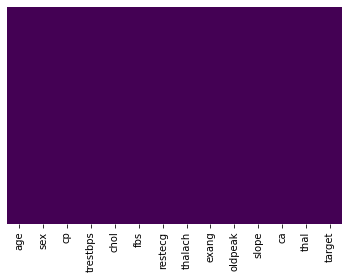

In [6]:
sns.heatmap(df1.isnull(),yticklabels=False,cbar = False,cmap='viridis')

**Inference : This heatmap shows filled values in purple and null values in yellow. Since no yellow is present in the figure we can once again conclude that the dataset is completely filled and has no null values.**

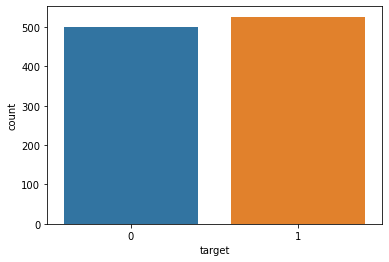

In [7]:
sns.countplot(x='target',data=df1)

**Inference : This plot gives us a count of the (0)- no of people without heart disease and (1)- no of people with heart disease. According to this dataset out of a 1000 patients about half of them (500) are diagnosed with a heart disease** 

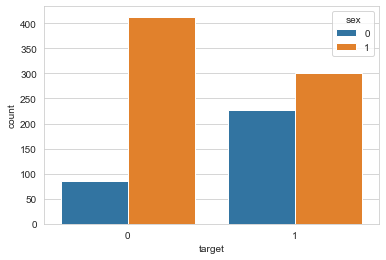

In [30]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=df1,hue='sex')

**Inference : This plot gives the count of males(1) and females(0) who do not have heart disease and have heart disease respectively.From this we can see that males are more prone to heart diseases**

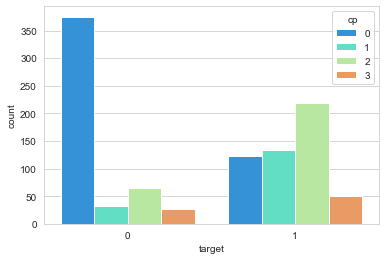

In [31]:
sns.set_style('whitegrid')
sns.countplot(x='target',hue='cp',data=df1,palette='rainbow')

**Inference : From this countplot we can infer that people with 0 chestpain mostly do not have a heart condition.Also a very less count of people with chestpains in levels 1,2 and 3 do not have a heart condition.Therefore it is better to consider medical advice if we have chestpain symptoms**

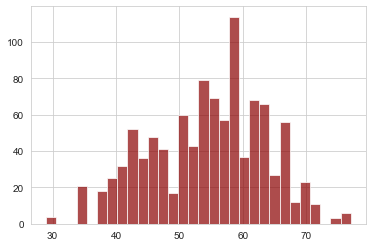

In [38]:
df1['age'].hist(bins=30,color='darkred',alpha=0.7)

**Inference : This plot is a histogram of the age column**

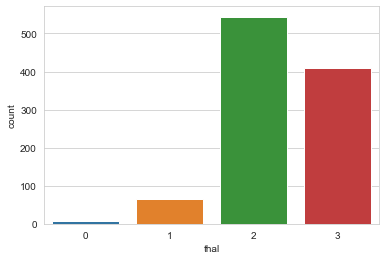

In [14]:
sns.countplot(x='thal',data=df1)

**Inference : This is a countplot of thal(Thalium Stress Test Result).From this we can observe that the count of people with thal level = 2 are high**

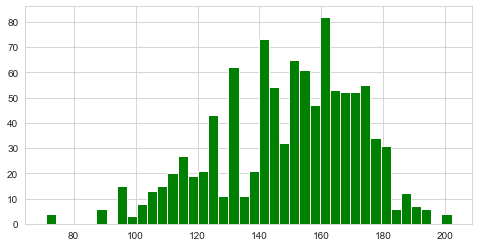

In [15]:
df1['thalach'].hist(color='green',bins=40,figsize=(8,4))

**Inference : This is a histogram of the thalach column**

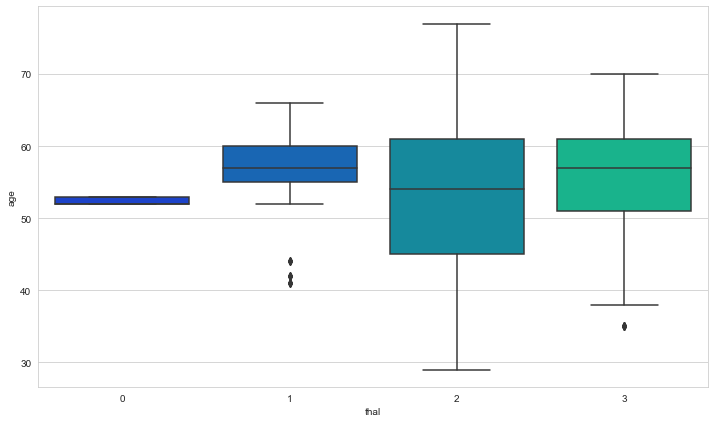

In [17]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='thal',y='age',data=df1,palette='winter')

**Inference : This is a box plot of thal vs age.From this we can find that the average age of people with thal =0 is 52 thal=1 is 56 thal=2 is 55 and thal=3 is 57**

# Data Cleaning

Datacleaning is done to fill the missing datavalues.**However from our above analysis we can say that this dataset does not have any missing datafields. Thus datacleaning is not required.**

However to demonstrate how datacleaning is done....let us assume age column has null fields

We'll use average age values from boxplot to impute based on thal for age.

In [35]:
def impute_age(cols):
    age = cols[0]
    thal = cols[1]
    
    if pd.isnull(age):

        if thal == 0:
            return 52

        elif thal == 1:
            return 56
            
        elif thal == 2:
            return 55

        else:
            return 57

    else:
        return age

Now we apply this function

In [36]:
df1['age'] = df1[['age','thal']].apply(impute_age,axis=1)

# Converting Categorical Features

In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


**Inference : From the dataframe info we can see that the datatype of all columns are integer and float and none object.Thus we need not create dummy variables using pandas.Our ML algorithm will be able to consider all the features as input without any change**

# Building a Logistic Regression model

## Train Test Split

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df1.drop('target',axis=1), 
                                                    df1['target'], test_size=0.30, 
                                                    random_state=101)

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [22]:
predictions = logmodel.predict(X_test)

## Training and Predicting

In [23]:
from sklearn.metrics import classification_report

In [24]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      0.77      0.83       148
           1       0.81      0.92      0.86       160

    accuracy                           0.85       308
   macro avg       0.85      0.84      0.85       308
weighted avg       0.85      0.85      0.85       308



**Inference : From the above classification report we can check presicion, recall and f1 score.This model has a good precision od 0.9 for not diseased and 0.81 for diseased.The accuracy of this model is about 85%.**